<a href="https://colab.research.google.com/github/Korniev/Data-Sciense/blob/main/hw_10/hw_10.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Частина 1

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

Перше, з чого нам потрібно почати – це завантажити датасет Fashion MNIST. Він доступний безпосередньо через Keras. Імпортуємо бібліотеки:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras import optimizers, losses
from sklearn.metrics import classification_report

Завантажимо датасет і подивимось на його вміст:

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Ми вже знаємо, що кожному зображенню відповідає одна мітка. Оскільки назви класів не включено до набору даних, збережемо їх тут, щоб використати пізніше при побудові зображень. Збережемо їх в ліст class_names:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Давайте подивимось на перший елемент датасету:

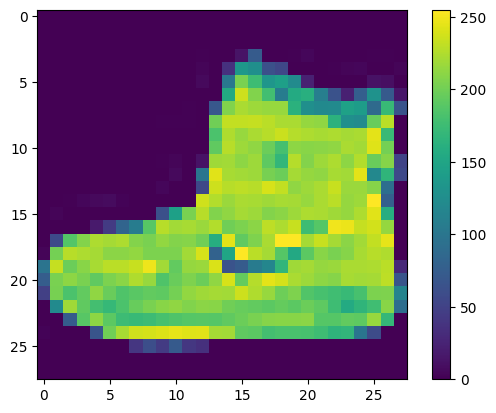

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Після завантаження нам потрібно нормалізувати дані. Це зробить процес навчання мережі більш ефективним. Тобто будуть дані в діапазоні від 0 до 1.

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


Щоб переконатися, що дані в правильному форматі, і що ми готові до побудови та навчання мережі, покажемо перші 25 зображень з навчального набору і покажемо назву класу під кожним зображенням.

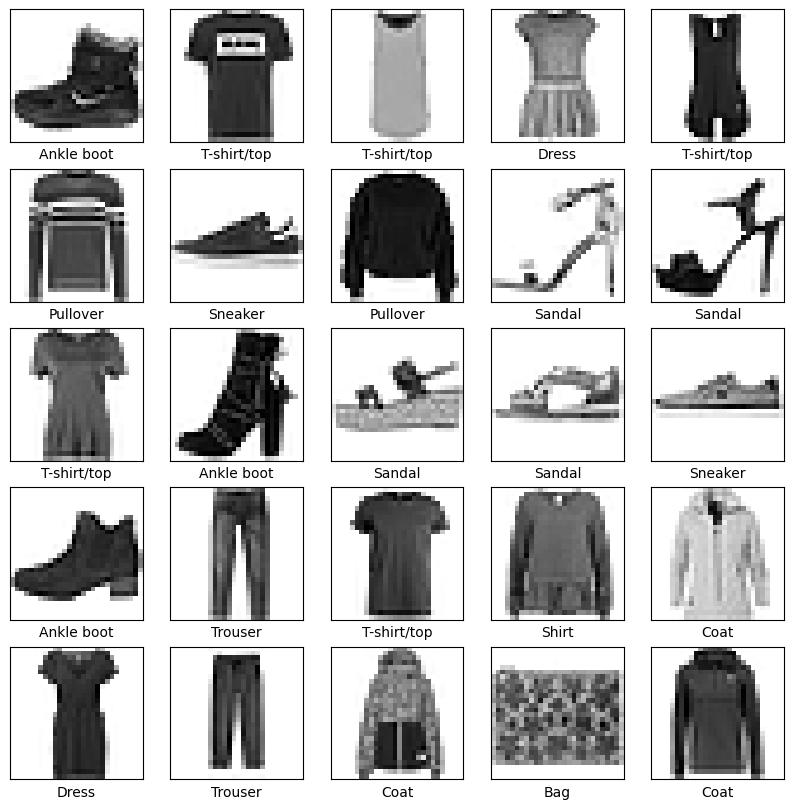

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Бачимо, що в нас дані в такій формі:

In [8]:
x_train.shape

(60000, 28, 28)

Кожна картинка у нас в 2d:

In [9]:
x_train[0].shape

(28, 28)

Картинка в 2D але Згорткові нейронні мережі працюють в 3d форматі - height x width x color. Тому додамо третю розмірність:

In [10]:
x_train= np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


Супер! Тепер подивимось яка кількість класів у нас в датасеті (хоча з попередньої ДЗ ми знаємо, що їх 10) але все ж:

In [11]:
K= len(set(y_train))
print("number of classes:", K)

number of classes: 10


Окей, супер. Зараз в нас вже є завантажений нормалізований датасет. Тепер ми вже можемо створити нашу модель. Ми почнемо з простої згорткової нейронної мережі:

In [61]:
model = Sequential([
    Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),

    Flatten(),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

Тепер надрукуємо опис архітектури мережі:

In [62]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_7 (Flatten)         (None, 1152)             

Перед тренуванням моделі нам її потрібно скомпілювати. Це включає вибір оптимізатора, функції втрат і метрик для оцінки.

In [63]:
model.compile(optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Тепер ми можемо навчати модель, використовуючи тренувальні дані:

In [64]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 6ms/step - loss: 0.7042 - accuracy: 0.7444 - val_loss: 0.4300 - val_accuracy: 0.8419
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4224 - accuracy: 0.8485 - val_loss: 0.3501 - val_accuracy: 0.8730
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3561 - accuracy: 0.8706 - val_loss: 0.3182 - val_accuracy: 0.8818
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3188 - accuracy: 0.8828 - val_loss: 0.3002 - val_accuracy: 0.8882
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2959 - accuracy: 0.8929 - val_loss: 0.2833 - val_accuracy: 0.8982
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2774 - accuracy: 0.8982 - val_loss: 0.2737 - val_accuracy: 0.8996
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2613 - accuracy: 0.9043 - val_loss: 0.2669 - val_accuracy: 0.9032
Epoch 

Давайте візуалізуємо отримані дані шляхом відображення отриманих результатів на графіках

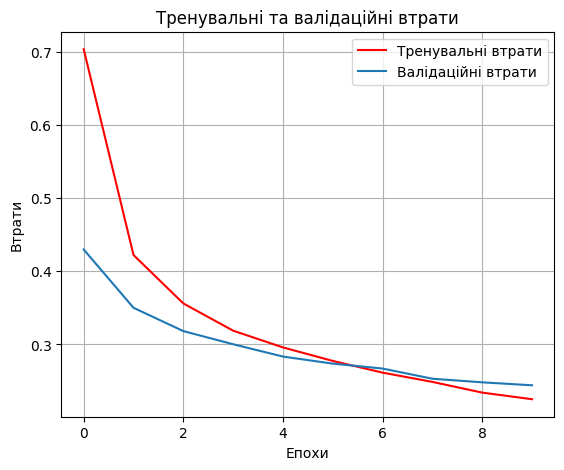

In [65]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

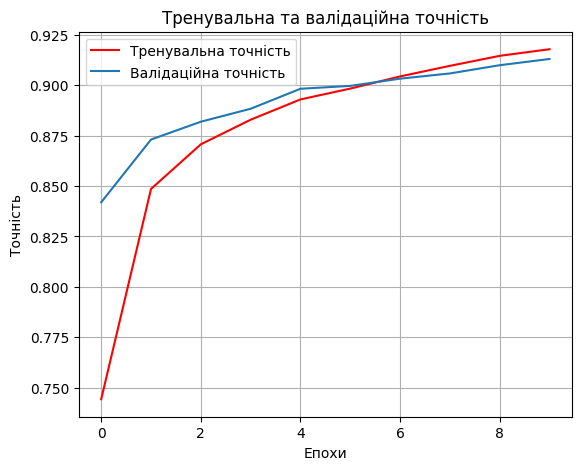

In [66]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Перевіримо втрати та точність моделі на тестовому наборі:

In [67]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Final valid loss after 10th epoch: {:.4f}'.format(score[0]))
print('Final valid accuracy after 10th epoch: {:.4f}'.format(score[1]))

Final valid loss after 10th epoch: 0.2618
Final valid accuracy after 10th epoch: 0.9067


Давайте подивимось на метрики якості по кожному класу:

In [68]:
y_pred_classes = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.86      0.86      1000
           3       0.90      0.92      0.91      1000
           4       0.83      0.86      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.72      0.77      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Як бачимо, наша навчена модель показала 91% точності як на тренувальному, так і на валідаційному датасеті.

Щодо метрик якості по класам, то вони теж набагато краще, ніж були по результатм повношарових нейронних мережах останнього дз, де в нас наприклад клас 6 показав такі результати:   6       0.71      0.64      0.67      1000

Тобто, згорткова нейронна мережа себе показує набагато краще, порівняно з класичною повношаровою нейронною мережею.

Зараз перейдемо до прогнозування.

Визначимо функції для побудови графіка повного набору з 10 передбачень класів.

In [69]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Зробимо прогнозування:

In [70]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Побудуємо кілька зображень з їхніми прогнозами:

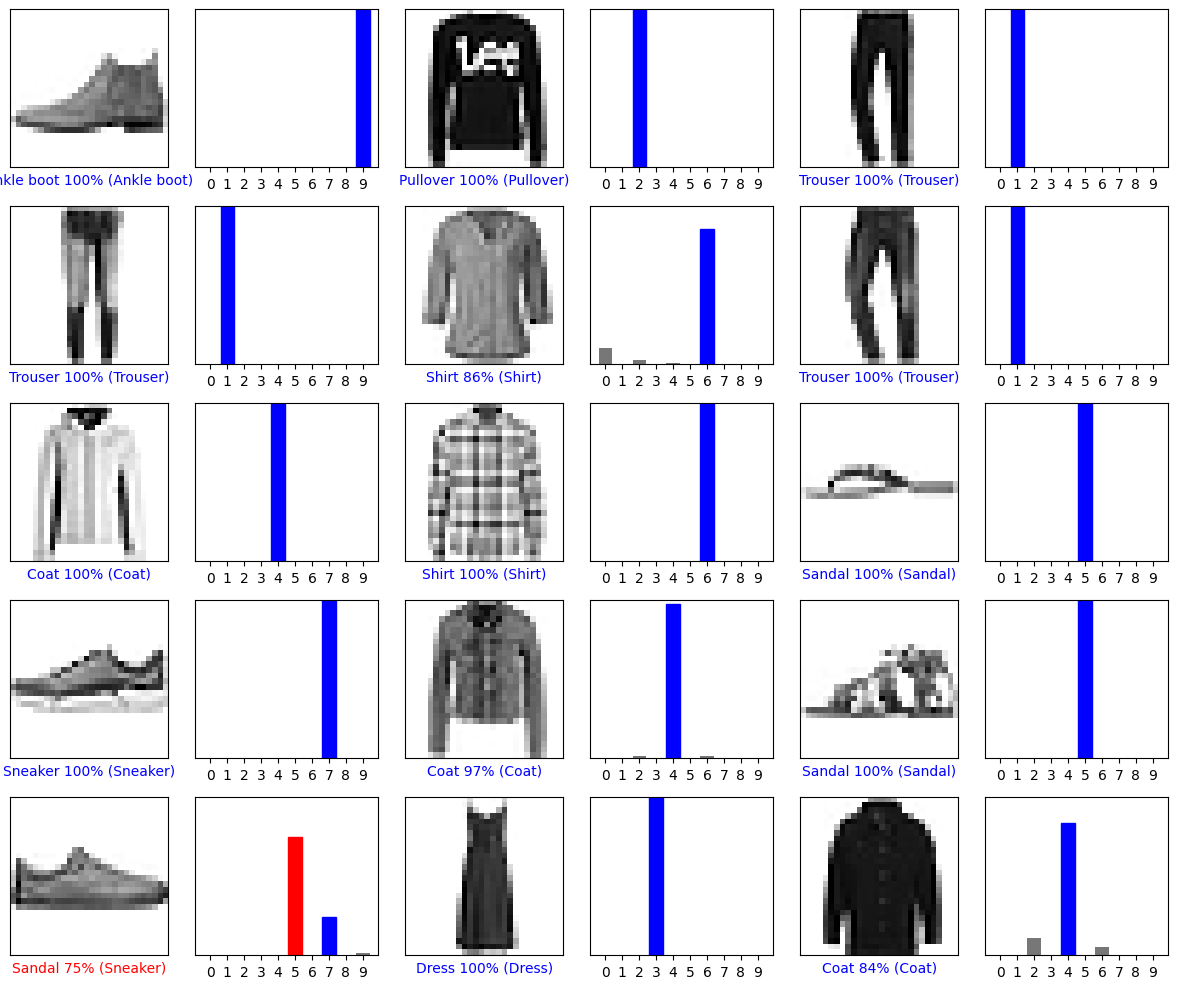

In [71]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Підібʼємо підсумки:

Ми створили згорткову нейронну мережу з достатньо простою архітектурою, а саме шарами Conv2D та MaxPooling2D, що генерують тривимірний тензор із формою (висота, ширина, канали), Flatten та двома повнозвʼязними шарами Dense та активаційними функціями relu, softmax. Також додали Dropout(0.2) для того, щоб наша модель не перенавчалась. Використали оптимізатор Adam та функцію втрат sparse_categorical_crossentropy. Навчили модель на 10 епохах. Візуалізували отримані результати на графіках та потім провели прогнозування. Отримали результати 91% точність тренована і 91 % точність валідована.

Як бачимо, наша модель доволі непогано навчилась і може адекватно класифікувати типи одягу. В нашому випадку ми отримали результат правильних прогнозувань 14 з 15, так як на 13 картинці мережа нам сказала, що це sandal, хоча насправді, то картинка з класу sneaker. Видно, що модель може помилятись з результатом, що є нормальним при даній точності валідаціних даних.

Щодо порівняння точності отриманої згортковою мережею з точністю, отриманою через багатошарову мережу з попереднього завдання, то можна сказати, що вони показали приблизно однакову тренувальну точність, близько 91% кожна, але згорткова показала себе краще саме на валідаційній точності, де вона показала 91% проти 89% багатошарової.